## Gaussian Profile - Mathematical Formula

A **1D Gaussian function** is given by:


$$
G(x) = \frac{A}{\sigma\sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

where:
- $A$ = Amplitude (peak height)  
- $mu$ = Mean (center position)  
- $\sigma$ = Standard deviation (controls the width of the bell)

---

## 1D Multi-Gaussian Model - Mathematical Formula

When multiple Gaussians are needed to model complex data, the total profile is a sum of individual Gaussians:


$$
G_{\text{total}}(x) = \sum_{i=1}^{N} A_i \cdot \exp\left(-\frac{(x - mu_i)^2}{2 \sigma_i^2}\right)
$$

Where:
- $N$ = Number of Gaussian components  
- $A_i$, $mu_i$, $\sigma_i$ = Amplitude, mean, and standard deviation of the i-th Gaussian component

---

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit # pip install scipy | Use non-linear least squares to fit a function, f, to data.

In [6]:
def gauss(x,A,mean,sig):
    gaussian = (A/sig*np.sqrt(2*np.pi))*np.exp(-((x-mean)**2)/2*(sig**2))
    return gaussian

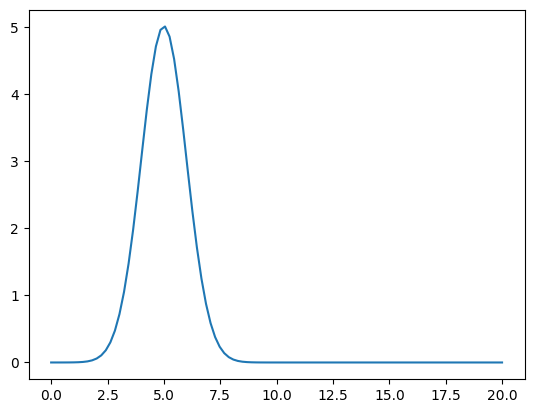

In [13]:
x_test = np.linspace(0,20,100)
gauss_test = gauss(x_test,2,5,1)
plt.plot(x_test,gauss_test)
plt.show()

In [16]:
def non_lin(x_val,a1,a2,m1,m2,w1,cont):
    return gauss(x_val,a1,m1,w1) + gauss(x_val,a2,m2,w1) + cont

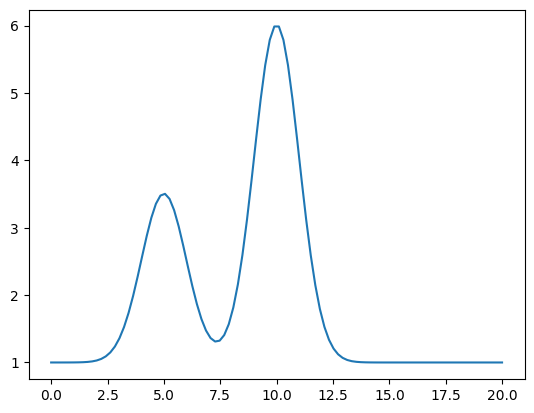

In [17]:
X_test = np.linspace(0,20,100)
Y_val = non_lin(X_test,1,2,5,10,1,1)
plt.plot(X_test,Y_val)
plt.show()

---
---

# Fitting Model for Guassian Profile

In [61]:
def fit(wave, flux, a1, a2, m1, m2, w1, cont):
    print("=======================")
    print("Preforming Least Square Fit....")

    opt_p, cov_matrix = curve_fit(non_lin, wave, flux, p0 = [a1,a2,m1,m2,w1,cont])
    err = np.sqrt(np.diag(cov_matrix))

    print("=======================")
    print("Printing the best fit parameters and 1 sig error....")
    print('A1:'+str(opt_p[0])+' A1_err:'+str(err[0])+'\n')
    print('A2:'+str(opt_p[1])+' A2_err:'+str(err[1])+'\n')
    print('wave1:'+str(opt_p[2])+' wave1_err:'+str(err[2])+'\n')
    print('wave2:'+str(opt_p[3])+' wave2_err:'+str(err[3])+'\n')
    print('cont-level:'+str(opt_p[5])+' wave2_err:'+str(err[0])+'\n')

    print("=======================")
    print("Ploting the observed and the modeled data....")
    y_model = non_lin(wave, *opt_p)
    plt.scatter(wave,flux, label = 'data', color="black")
    plt.plot(wave,y_model, label ='model', color="purple")
    plt.vlines(opt_p[2], ymin=0, ymax=flux.max(), ls="--")
    plt.vlines(opt_p[3], ymin=0, ymax=flux.max(), ls="--")
    plt.legend()
    plt.show()

    return opt_p, cov_matrix

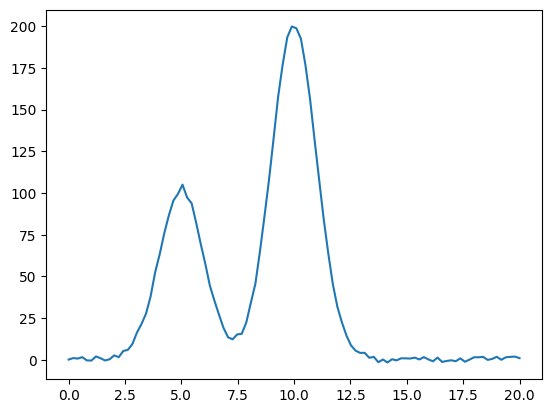

In [62]:
wave_test = np.linspace(0,20,100)
pure_model = non_lin(wave_test,20,40,5,10,1,0.25)

# fake data with some noise
test_func = pure_model + np.random.normal(loc=pure_model, size=len(pure_model))

plt.plot(wave_test,test_func)
plt.show()

Preforming Least Square Fit....
Printing the best fit parameters and 1 sig error....
A1:40.51439855169145 A1_err:0.20008432609469637

A2:80.38384180098662 A2_err:0.309124653506865

wave1:5.0042624867084555 wave1_err:0.00508051169406021

wave2:9.99659270542434 wave2_err:0.0025583348462715374

cont-level:0.5496075830592495 wave2_err:0.20008432609469637

Ploting the observed and the modeled data....


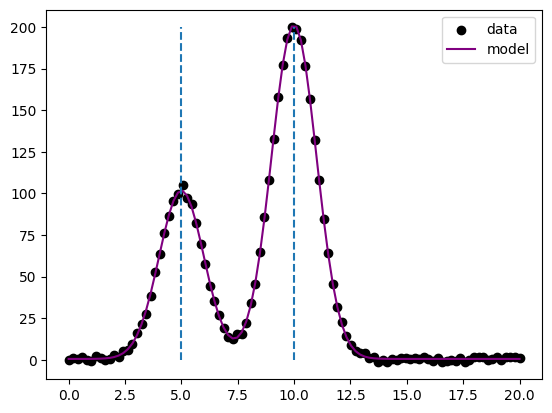

In [63]:
out_popt, out_covm = fit(wave_test,test_func,18,36,4.5,9.5,1,0.5)

___

# Redshift Calculation using Real Galaxy Data from SDSS

portal - https://skyserver.sdss.org/dr18/VisualTools/navi

In [64]:
from astropy.io import fits # pip install astropy

In [65]:
data = fits.open("spec-1678-53433-0429.fits")
data.info()

Filename: spec-1678-53433-0429.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3847R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [66]:
data[1].data

FITS_rec([(1.5803467, 3.5799, 0.22995354, 0, 0, 1.0902199 , 13.570282 , 2.1939962),
          (2.8961751, 3.58  , 0.2228527 , 0, 0, 1.0899218 , 13.636346 , 2.1609232),
          (4.125976 , 3.5801, 0.21568872, 0, 0, 1.0896237 , 13.741717 , 2.2699652),
          ...,
          (9.354457 , 3.9643, 0.81554604, 0, 0, 0.6420497 ,  4.846242 , 9.8850565),
          (7.650643 , 3.9644, 0.8335321 , 0, 0, 0.64204544,  5.324669 , 9.922324 ),
          (7.220164 , 3.9645, 0.7777352 , 0, 0, 0.6420399 ,  5.9386463, 9.962829 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [67]:
print(data[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


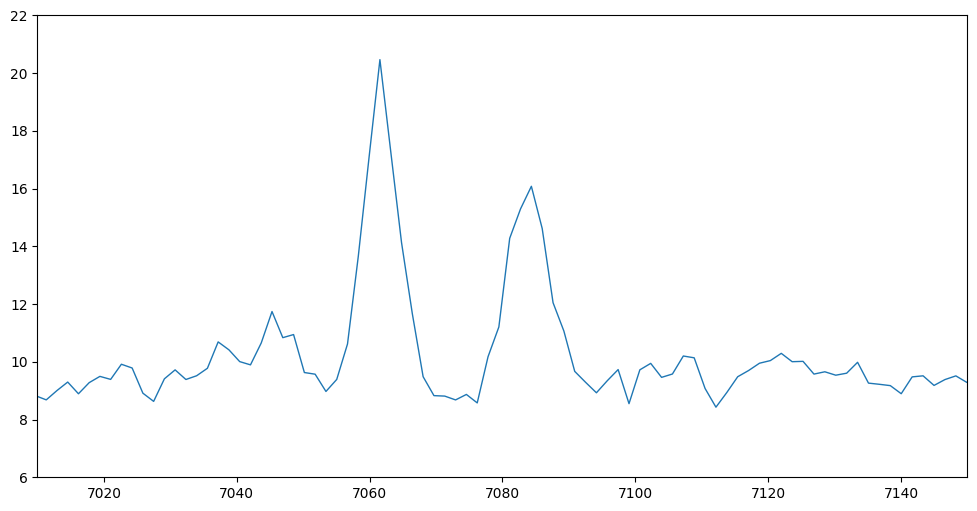

In [68]:
flux = data[1].data['flux']
wave = 10**data[1].data['loglam']

plt.figure(figsize=(12,6))
plt.xlim(7010,7150)
plt.ylim(6,22)
plt.plot(wave,flux, lw = 1)
plt.show()

In [69]:
import scipy.signal as ss

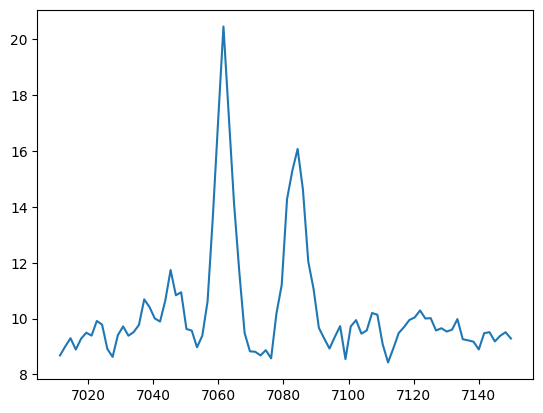

In [70]:
sub_id = np.where((wave>7010)&(wave<7150))
sub_flux  = flux[sub_id]
sub_wave = wave[sub_id]
plt.plot(sub_wave,sub_flux)
plt.show()

In [71]:
flux_peaks = ss.find_peaks(sub_flux, height = 14)[0] # min height for guess
means = sub_wave[flux_peaks]
print(means)

[7061.551 7084.351]


Preforming Least Square Fit....
Printing the best fit parameters and 1 sig error....
A1:1.568897557792623 A1_err:0.11654646402726145

A2:1.0908093978060263 A2_err:0.09078816056630404

wave1:7061.671153484904 wave1_err:0.13249369254558355

wave2:7083.840983904685 wave2_err:0.19085570233134586

cont-level:9.53364393034269 wave2_err:0.11654646402726145

Ploting the observed and the modeled data....


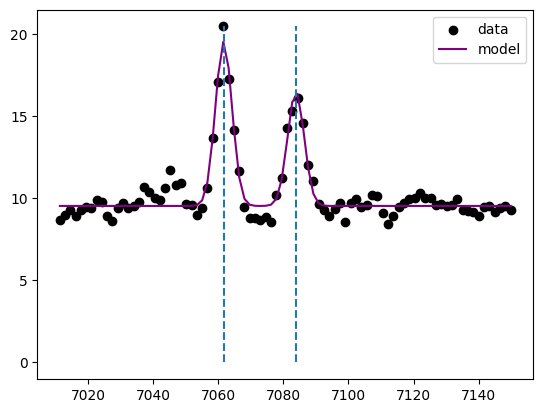

In [72]:
out_p , covm_ = fit(sub_wave, sub_flux, 20, 16, *means,1,5)

In [78]:
# calculating the redshift 
h_alpha = 6562.8 
n_ii = 6583

# redshift function 
def red(wo,wt):
    return (wo-wt)/wt

z1 = red(7061.671153484904,h_alpha)
z1

0.07601498651260186

In [79]:
z2 = red(out_p[3],n_ii)
z2

np.float64(0.07608096367988536)

In [84]:
# recessional velocity (v=c*z)
v1 = 300000*z1
v1 #km/s

22804.495953780555

In [85]:
v2 = 300000*z2
v2

np.float64(22824.289103965606)

In [89]:
#d = v/ho using hubble law
h0 = 70 #km/s/Mpc
d1 = v1/h0
d1

325.7785136254365

In [90]:
d2 = v2/h0
d2

np.float64(326.06127291379437)

-- THE END OF TODAYS SESSION --